In [ ]:
!pip install transformers


This model is a fine-tune checkpoint of **DistilBERT-base-cased**, fine-tuned using (a second step of) knowledge distillation on SQuAD v1.1. This model reaches a F1 score of 87.1 on the dev set (for comparison, BERT bert-base-cased version reaches a F1 score of 88.7).

In [5]:
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForQuestionAnswering
from transformers import AutoConfig, AutoModel

# best performing model for our QA
name = 'distilbert-base-cased-distilled-squad'

tokenizer = AutoTokenizer.from_pretrained(name,)

model = AutoModelForQuestionAnswering.from_pretrained(name)

# init inference pipeline 
nlp = pipeline('question-answering', model = model, tokenizer = tokenizer)

# create a return
def answer_que(questt, anss):
    print(nlp({
    'question': questt,
    'context': anss
}))

In [ ]:
def transcriptName():

  name = input('Filename: ')
  with open (('/content/docs/' + name + '.txt'), "r") as myfile:

    next(myfile)
    data=myfile.read().replace('\n', '')

    randomisation_que = answer_que('What are you randomised for?', data)
    computer_que = answer_que("What does the computer decide?", data)
    medical_management_que = answer_que("What is medical management?", data)
    surgery_que = answer_que("What are the risks of surgery?", data)
    questionnaire_que = answer_que("Will you be receiving questionnaires?", data)
    clear_decision_que = answer_que("Are you happy with all that?", data)

In [10]:
transcriptName()

Filename: 4
{'score': 0.8636280298233032, 'start': 7747, 'end': 7766, 'answer': 'having no operation'}
{'score': 0.2755652964115143, 'start': 12046, 'end': 12085, 'answer': 'you are allocated to medical management'}
{'score': 0.21321631968021393, 'start': 12088, 'end': 12115, 'answer': 'I am going to stop the tape'}
{'score': 0.3175947070121765, 'start': 3915, 'end': 3957, 'answer': 'complications and risks associated with it'}
{'score': 0.0324772447347641, 'start': 11502, 'end': 11551, 'answer': 'You are going to carry on with your questionnaire'}
{'score': 0.608458399772644, 'start': 10720, 'end': 10740, 'answer': 'I am under 11 stones'}


In [22]:
import os


directory = '/content/docs/'

for filename in os.listdir(directory):
  with open(directory + filename) as infile:
    try:

      next(infile)

      data=infile.read().replace('\n', '')
      print('\nFilename: ' + filename)
      randomisation_que = answer_que('What are you randomised for?', data)
      computer_que = answer_que("What does the computer decide?", data)
      medical_management_que = answer_que("What is medical management?", data)
      surgery_que = answer_que("What are the risks of surgery?", data)
      questionnaire_que = answer_que("Will you be receiving questionnaires?", data)
      clear_decision_que = answer_que("Are you happy with all that?", data)

    except:
        print(filename + ' is throwing an error')



Filename: 29.txt
{'score': 0.5226444602012634, 'start': 10329, 'end': 10345, 'answer': 'not an operation'}
{'score': 0.07291511446237564, 'start': 9422, 'end': 9440, 'answer': 'right out my hands'}
{'score': 0.6143898963928223, 'start': 13985, 'end': 13990, 'answer': 'nurse'}
{'score': 0.009432535618543625, 'start': 8528, 'end': 8582, 'answer': 'by cutting down to a lower fat diet can control things'}
{'score': 0.003945516888052225, 'start': 10012, 'end': 10061, 'answer': 'P - I get signed up for these things all the time'}
{'score': 0.11926814913749695, 'start': 8186, 'end': 8233, 'answer': 'that is where it might be useful for this study'}

Filename: 10.txt
{'score': 0.027786951512098312, 'start': 5151, 'end': 5185, 'answer': 'We will do whatever you want to do'}
{'score': 0.04730847850441933, 'start': 3504, 'end': 3519, 'answer': 'generate a code'}
{'score': 0.022930452600121498, 'start': 1827, 'end': 1843, 'answer': 'heart conditions'}
{'score': 0.002328341593965888, 'start': 1365

In [81]:
z = 'What does the computer decide?'
y = 'Computer decides on your gender'

x = nlp({
    'question': z,
    'context': y})


In [84]:
x['score']
x['answer']


'your gender'

In [6]:
randomisation_que = 'What are you randomised for?'
computer_que = "What does the computer decide?"
medical_management_que = "What is medical management?"
surgery_que = "What are the risks of surgery?"
questionnaire_que = "Will you be receiving questionnaires?"
clear_decision_que = "Are you happy with all that?"



In [ ]:
x = nlp({
    'question': 'What does the computer decide?',
    'context': 'Computer decides on your gender'})


In [13]:
import os


directory = '/content/docs/'
score_list = []

for filename in os.listdir(directory):
  with open(directory + filename) as infile:
    try:

      data=infile.read().replace('\n', '')
      x = nlp({
          'question':randomisation_que,
          'context': data
      })

      score_list.append(x['score'])

    except:
        print(filename + ' is throwing an error')

print(score_list)

[0.3747791349887848, 0.12537892162799835, 0.18789605796337128, 0.7784918546676636, 0.623502790927887, 0.4809792637825012, 0.28267475962638855, 0.20865073800086975, 0.8053053021430969, 0.7759636640548706, 0.3310084640979767, 0.5312545299530029, 0.21459509432315826, 0.928913950920105, 0.05525359511375427, 0.22943376004695892, 0.4091120660305023, 0.4248239994049072, 0.9190966486930847, 0.030816739425063133, 0.8952293992042542, 0.4812144935131073, 0.12059758603572845, 0.19168707728385925, 0.24029052257537842, 0.31340715289115906, 0.5343955755233765, 0.0025197055656462908, 0.009715881198644638, 0.8786020874977112, 0.1288926750421524]


In [34]:
file = open('medical_management_que.txt', 'w') #write to file
for line in str(score_list_3):
     file.write(line)
file.close() #close file

In [14]:
import pprint
pprint.pprint(score_list)

[0.3747791349887848,
 0.12537892162799835,
 0.18789605796337128,
 0.7784918546676636,
 0.623502790927887,
 0.4809792637825012,
 0.28267475962638855,
 0.20865073800086975,
 0.8053053021430969,
 0.7759636640548706,
 0.3310084640979767,
 0.5312545299530029,
 0.21459509432315826,
 0.928913950920105,
 0.05525359511375427,
 0.22943376004695892,
 0.4091120660305023,
 0.4248239994049072,
 0.9190966486930847,
 0.030816739425063133,
 0.8952293992042542,
 0.4812144935131073,
 0.12059758603572845,
 0.19168707728385925,
 0.24029052257537842,
 0.31340715289115906,
 0.5343955755233765,
 0.0025197055656462908,
 0.009715881198644638,
 0.8786020874977112,
 0.1288926750421524]


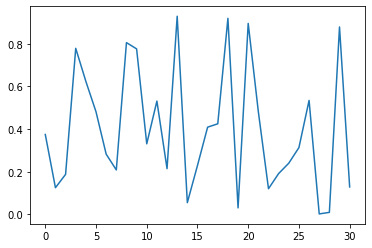

In [107]:
import pandas as pd
import matplotlib.pyplot as plt

plt.plot(score_list)
plt.show()

In [7]:
import os


directory = '/content/docs/'
score_list_2 = []

for filename in os.listdir(directory):
  with open(directory + filename) as infile:
    try:

      data=infile.read().replace('\n', '')
      x = nlp({
          'question':computer_que,
          'context': data
      })

      score_list_2.append(x['score'])

    except:
        print(filename + ' is throwing an error')

print(score_list_2)

[0.1308751255273819, 0.11912988871335983, 0.04316253215074539, 0.36208629608154297, 0.03938354551792145, 0.1354415863752365, 0.5978286266326904, 0.6046351790428162, 0.046676669269800186, 0.5719860196113586, 0.21698470413684845, 0.5834461450576782, 0.5312195420265198, 0.19467993080615997, 0.6606565117835999, 0.04971395432949066, 0.5468055605888367, 0.0002447949373163283, 0.2661902606487274, 0.9134517908096313, 0.3855974078178406, 0.45806485414505005, 0.040325239300727844, 0.19204825162887573, 0.18949288129806519, 0.6894974708557129, 0.6243042349815369, 0.18557171523571014, 0.06276179105043411, 0.29171299934387207, 0.5083581805229187]


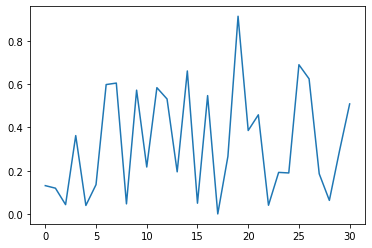

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

plt.plot(score_list_2)
plt.show()

In [9]:
import os


directory = '/content/docs/'
score_list_3 = []

for filename in os.listdir(directory):
  with open(directory + filename) as infile:
    try:

      data=infile.read().replace('\n', '')
      x = nlp({
          'question':medical_management_que,
          'context': data
      })

      score_list_3.append(x['score'])

    except:
        print(filename + ' is throwing an error')

print(score_list_3)

[0.3631815016269684, 0.6514992117881775, 0.03235696628689766, 0.6071388721466064, 0.2117380052804947, 0.09934431314468384, 0.37295421957969666, 0.4070926904678345, 0.08415807783603668, 0.13119135797023773, 0.04372737184166908, 0.2588652968406677, 0.01417575217783451, 0.23893983662128448, 0.06123989820480347, 0.25963908433914185, 0.05831034108996391, 0.001841309480369091, 0.6902003884315491, 0.3015187084674835, 0.10311637818813324, 0.709596574306488, 0.4227101802825928, 0.10678847879171371, 0.08915037661790848, 0.493455171585083, 0.04714666306972504, 0.003384245093911886, 0.0018003045115619898, 0.6908895373344421, 0.11377998441457748]


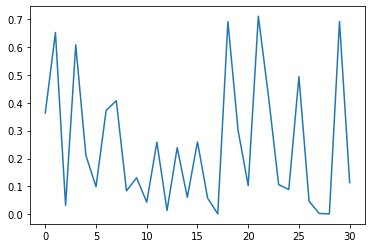

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

plt.plot(score_list_3)
plt.show()

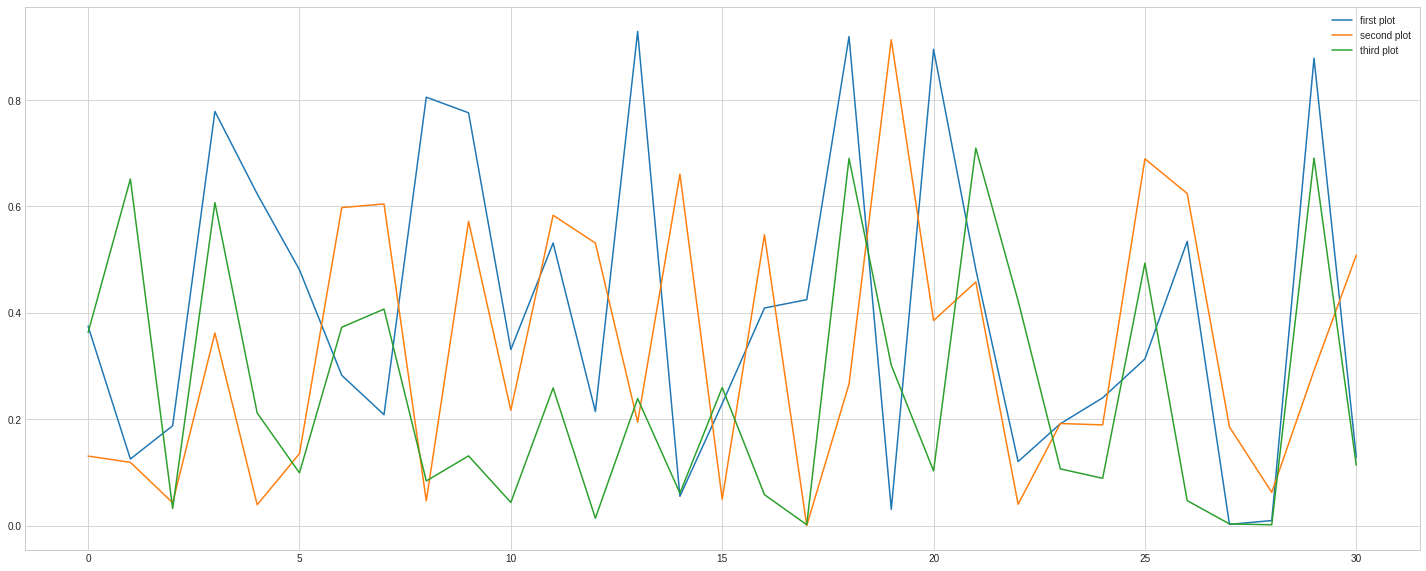

In [21]:
plt.figure(figsize=(25,10)) 
plt.style.use('seaborn-whitegrid')

plt.plot(score_list, label='first plot')
plt.plot(score_list_2, label='second plot')
plt.plot(score_list_3, label='third plot')
plt.legend()